# Homework 02 

In [32]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import PolynomialFeatures
import scipy.special
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from statsmodels.graphics.factorplots import interaction_plot
from sklearn.metrics import (confusion_matrix, accuracy_score)

### Q1. Using the sales.csv Download sales.csv, write code to show effects of interactions, if any, on the linear regression model to predict the total_sales for a new area using given sales from three areas.

In [64]:
#Import Dataset
sales = pd.read_csv("/Users/crystal/Desktop/assign02_0122/sales.csv")
sales.columns
sales

Index(['Unnamed: 0', 'area1_sales', 'area2_sales', 'area3_sales',
       'total_sales'],
      dtype='object')

,Unnamed: 0,area1_sales,area2_sales,area3_sales,total_sales
0,1000,0.79,0.80,0.02,1.75
1,1001,0.83,0.08,0.18,1.75
2,1002,0.85,0.01,0.22,1.75
3,1003,1.25,0.00,0.03,1.75
4,1004,0.72,0.04,0.10,1.74
...,...,...,...,...,...
2995,3995,0.20,0.00,0.07,0.49
2996,3996,0.28,0.00,0.04,0.49
2997,3997,0.00,0.49,0.00,0.49
2998,3998,0.07,0.09,0.07,0.49


- #### Fit linear regression without any interaction terms


In [65]:
Xb = sm.add_constant(sales[['area1_sales', 'area2_sales', 'area3_sales']])
y = sales['total_sales']
mod = smf.ols(formula= 'total_sales ~ area1_sales + area2_sales + area3_sales', data = sales).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_sales   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2354.
Date:                Sun, 22 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:30:16   Log-Likelihood:                 761.25
No. Observations:                3000   AIC:                            -1515.
Df Residuals:                    2996   BIC:                            -1490.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2601      0.008     30.743      0.000       0.243       0.277
area1_sales     0.9148      0.013     72.435      0.000       0.890       0.940
area2_sales     0.7489      0.015     49.102      0.000       0.719       0.779
area3_sales     1.7136      0.039     44.344      0.000       1.638       1.789
==============================================================================
Omnibus:                      482.733   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2611.741
Skew:                           0.653   Prob(JB):                         0.00
Kurtosis:                       7.380   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- #### Fit linear regression with interaction terms


In [368]:
mod_interaction = smf.ols(formula='total_sales ~ area1_sales + area2_sales + area3_sales + area1_sales:area2_sales + area2_sales:area3_sales + area1_sales:area3_sales + area1_sales:area2_sales:area3_sales ', data=sales).fit()
mod_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_sales   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1075.
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        01:32:35   Log-Likelihood:                 830.59
No. Observations:                3000   AIC:                            -1645.
Df Residuals:                    2992   BIC:                            -1597.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.3119      0.010     32.077      0.000       0.293       0.331
area1_sales                             0.7852      0.018     42.656      0.000       0.749       0.821
area2_sales                             0.6518      0.020     33.057      0.000       0.613       0.690
area3_sales                             1.2583      0.065     19.447      0.000       1.131       1.385
area1_sales:area2_sales                 0.1991      0.091      2.188      0.029       0.021       0.377
area2_sales:area3_sales                 0.1994      0.458      0.436      0.663      -0.698       1.097
area1_sales:area3_sales                 1.0889      0.144      7.550      0.000       0.806       1.372
area1_sales:area2_sales:area3_sales     5.3078      1.461      3.634      0.000       2.444       8.172
==============================================================================
Omnibus:                      550.091   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2499.463
Skew:                           0.815   Prob(JB):                         0.00
Kurtosis:                       7.164   Cond. No.                         496.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Comparison and Conclusion
Compared with regression model without interaction terms, regression model with interaction terms 
1. has higher R-squared (0.714 > 0.702)
2. lower AIC and BIC <br>
Therefore, this suggests that model with interactions of sales in three areas produces better prediction of total sales. <br>
In addition, the interaction term of sales of area 1 and sales of area 2, sales of area 1 and sales of area 3, sales of area 1 and sales of area 2 and sales of area 3 are all significant at 0.05 significance level. 

### Q2. Develop a full Logistic Regression Model using customer.csv to predict whether the customer will purchase the product. Also train trimmed logistic regression models (Trimmed over features in the data). Compute the "in-sample R2" (pseudo) for the models you train and compare the models based on this metric.

In [106]:
# Import Dataset
cus = pd.read_csv("/Users/crystal/Desktop/assign02_0122/customer.csv")
cus.columns
#Transform Gender to binary variable with value equals to 1 if male and value equals to 0 if female
cus['Gender'] = np.where(cus['Gender'] =='Male', 1, 0)
cus

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [93]:
#Y & X variables 
x = cus[['Gender','Age','EstimatedSalary']]
y = cus['Purchased']

In [94]:
#Split data set into test set and train set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state= 42)

In [95]:
#Scaling data using robust scalar 
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)
#Training Dataset
df_train = pd.DataFrame(np.c_[x_train, y_train])
df_train.columns = ['Gender','Age','EstimatedSalary','Purchased']
df_train

##Test Dataset
df_test = pd.DataFrame(np.c_[x_test, y_test])
df_test.columns = ['Gender','Age','EstimatedSalary','Purchased']
df_test
Xtest = df_test[['Gender','Age','EstimatedSalary']]
ytest = df_test['Purchased']

,Gender,Age,EstimatedSalary,Purchased
0,-0.5,-0.666667,-0.311111,0.0
1,0.5,0.600000,-0.955556,1.0
2,-0.5,0.133333,1.400000,1.0
3,-0.5,0.466667,-0.711111,0.0
4,-0.5,1.333333,-1.000000,1.0
...,...,...,...,...
315,-0.5,-0.866667,-0.977778,0.0
316,-0.5,-0.733333,-0.800000,0.0
317,-0.5,0.400000,1.377778,0.0
318,0.5,0.133333,0.133333,0.0


,Gender,Age,EstimatedSalary,Purchased
0,0.0,0.552632,-1.055215,0.0
1,0.0,1.236842,0.564417,1.0
2,0.0,-0.394737,-0.515337,0.0
3,0.0,0.657895,0.760736,1.0
4,0.0,-0.342105,-0.907975,0.0
...,...,...,...,...
75,0.0,-0.026316,-0.368098,0.0
76,1.0,1.078947,1.668712,1.0
77,0.0,0.973684,-0.957055,1.0
78,0.0,-0.026316,-0.441718,0.0


#### 1). Full Logistic Regression Model 

In [96]:
log_reg = smf.logit("Purchased ~ Gender + Age + EstimatedSalary", data=df_train).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.371365
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                            3
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.4313
Time:                        20:33:47   Log-Likelihood:                -118.84
converged:                       True   LL-Null:                       -208.98
Covariance Type:            nonrobust   LLR p-value:                 7.661e-39
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.2108      0.188     -6.430      0.000      -1.580      -0.842
Gender              0.3156      0.328      0.961      0.337      -0.328       0.959
Age                 3.1690      0.400      7.923      0.000       2.385       3.953
EstimatedSalary     1.6159      0.259      6.233      0.000       1.108       2.124
===================================================================================
"""

The Pseudo R-squared of the full logistic regression model is 0.4313.

In [97]:
# Calculating Odds Ratios
odds_ratios = pd.DataFrame(
    {
        "Odds Ratio": log_reg.params,
        "Lower CI": log_reg.conf_int()[0],
        "Upper CI": log_reg.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)

                 Odds Ratio   Lower CI   Upper CI
Intercept          0.297961   0.206006   0.430963
Gender             1.371019   0.720295   2.609615
Age               23.783897  10.860041  52.087627
EstimatedSalary    5.032569   3.027683   8.365062


In [98]:
# performing predictions on the test dataset
yhat = log_reg.predict(Xtest)
prediction = list(map(round, yhat))
  
# comparing original and predicted values of y
print('Actual values', list(ytest.values))
print('Predictions :', prediction)

Actual values [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0]
Predictions : [0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0]


In [99]:
# Accuracy score of the model
print('Test accuracy = ', accuracy_score(ytest, prediction))

Test accuracy =  0.85


Confusion Matrix : 
 [[46  6]
 [ 6 22]]


[[<matplotlib.axis.XTick at 0x7fac163896d0>,
 [Text(0, 0, 'Predicted 0s'), Text(1, 0, 'Predicted 1s')]]

[[<matplotlib.axis.YTick at 0x7fac16389b20>,
 [Text(0, 0, 'Actual 0s'), Text(0, 1, 'Actual 1s')]]

(1.5, -0.5)

Text(0, 0, '46')

Text(1, 0, '6')

Text(0, 1, '6')

Text(1, 1, '22')

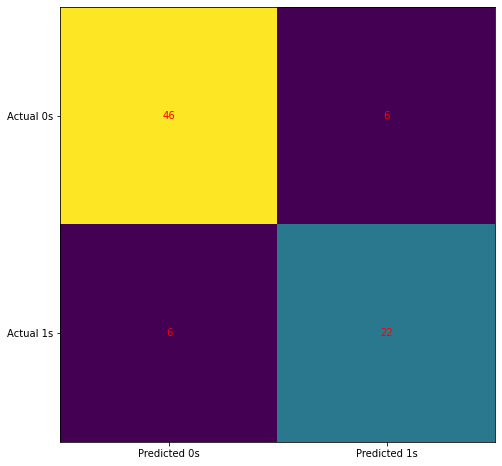

In [100]:
# Confusion Matrix
cm = confusion_matrix(ytest, prediction) 
print ("Confusion Matrix : \n", cm) 

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

#### 2). Trimmed Logistic Regression Models

In [41]:
#01. Purchased ~ Gender
log_reg_01 = smf.logit("Purchased ~ Gender", data=df_train).fit()
log_reg_01.summary()
##Pseudo R-squ.:	0.0008121

#02. Purchased ~ Age
log_reg_02 = smf.logit("Purchased ~ Age", data=df_train).fit()
log_reg_02.summary()
##Pseudo R-squ.:	0.3056


#03. Purchased ~ EstimatedSalary
log_reg_03 = smf.logit("Purchased ~ EstimatedSalary", data=df_train).fit()
log_reg_03.summary()
##Pseudo R-squ.:	0.1142

#04. Purchased ~ Gender + Age 
log_reg_04 = smf.logit("Purchased ~ Gender + Age", data=df_train).fit()
log_reg_04.summary()
##Pseudo R-squ.:	0.3059

#05. Purchased ~ Gender + EstimatedSalary
log_reg_05 = smf.logit("Purchased ~ Gender + EstimatedSalary", data=df_train).fit()
log_reg_05.summary()
##Pseudo R-squ.:	0.1143


#06. Purchased ~ Age + EstimatedSalary
log_reg_06 = smf.logit("Purchased ~ Age + EstimatedSalary", data=df_train).fit()
log_reg_06.summary()
##Pseudo R-squ.:	0.4291

Optimization terminated successfully.
         Current function value: 0.652527
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      318
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:               0.0008121
Time:                        16:49:00   Log-Likelihood:                -208.81
converged:                       True   LL-Null:                       -208.98
Covariance Type:            nonrobust   LLR p-value:                    0.5602
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5787      0.117     -4.964      0.000      -0.807      -0.350
Gender        -0.1358      0.233     -0.582      0.560      -0.593       0.321
==============================================================================
"""

Test accuracy of model 01 =  0.65
Optimization terminated successfully.
         Current function value: 0.453478
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      318
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.3056
Time:                        16:49:00   Log-Likelihood:                -145.11
converged:                       True   LL-Null:                       -208.98
Covariance Type:            nonrobust   LLR p-value:                 1.285e-29
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9953      0.159     -6.260      0.000      -1.307      -0.684
Age            2.5667      0.300      8.558      0.000       1.979       3.155
==============================================================================
"""

Test accuracy of model 02 =  0.9125
Optimization terminated successfully.
         Current function value: 0.578480
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      318
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.1142
Time:                        16:49:00   Log-Likelihood:                -185.11
converged:                       True   LL-Null:                       -208.98
Covariance Type:            nonrobust   LLR p-value:                 4.891e-12
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.6383      0.127     -5.016      0.000      -0.888      -0.389
EstimatedSalary     1.1298      0.178      6.333      0.000       0.780       1.479
===================================================================================
"""

Test accuracy of model 03 =  0.775
Optimization terminated successfully.
         Current function value: 0.453282
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      317
Method:                           MLE   Df Model:                            2
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.3059
Time:                        16:49:00   Log-Likelihood:                -145.05
converged:                       True   LL-Null:                       -208.98
Covariance Type:            nonrobust   LLR p-value:                 1.723e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9987      0.160     -6.260      0.000      -1.311      -0.686
Gender         0.1037      0.293      0.354      0.723      -0.471       0.678
Age            2.5764      0.302      8.538      0.000       1.985       3.168
==============================================================================
"""

Test accuracy of model 04 =  0.9125
Optimization terminated successfully.
         Current function value: 0.578434
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      317
Method:                           MLE   Df Model:                            2
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.1143
Time:                        16:49:01   Log-Likelihood:                -185.10
converged:                       True   LL-Null:                       -208.98
Covariance Type:            nonrobust   LLR p-value:                 4.259e-11
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.6381      0.127     -5.014      0.000      -0.888      -0.389
Gender             -0.0430      0.252     -0.170      0.865      -0.538       0.452
EstimatedSalary     1.1281      0.179      6.314      0.000       0.778       1.478
===================================================================================
"""

Test accuracy of model 05 =  0.775
Optimization terminated successfully.
         Current function value: 0.372821
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      317
Method:                           MLE   Df Model:                            2
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                  0.4291
Time:                        16:49:01   Log-Likelihood:                -119.30
converged:                       True   LL-Null:                       -208.98
Covariance Type:            nonrobust   LLR p-value:                 1.133e-39
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.1949      0.186     -6.408      0.000      -1.560      -0.829
Age                 3.1192      0.391      7.968      0.000       2.352       3.887
EstimatedSalary     1.5981      0.258      6.186      0.000       1.092       2.104
===================================================================================
"""

Test accuracy of model 06 =  0.85


### Q3. For the Logistic Regression models trained above, pick the best model wrt to the in-sample R2 and give your interpretation of the model’s coefficients (For example, what effect does a positive or negative coefficient have on the model and so on).

**Answer**: The model Purchased ~ Gender + Age + Estimated Salary is the best model based on its highest in-sample R2 0.85. <br>
**Interpretation**: Gender, Age and Estimated Salary all have positive effect on the probability of making a purchase.  <br>
The model suggests that male customers have a 37% higher probability of making purchase compared to female customers with the same age and estimated salary; <br>
The probability of making a purchase for customers who are one year older is 22.78 times of the probability of making a purchase for customers who are one year younger with the same age and gender; <br>
The probability of making a purchase for customers who have 1 unit of estimated salary higher is about 4 times of the probability of making a purchase for customers who have 1 unit of estimated salary lower.

### Q4. Is accuracy a good metric to judge the above model? Give reasons and alternatives to support your answer.

**Answer**: I think accuracy is a good metric here as the accuracy here is calculated based on the test dataset, in other words, it is an out-of-sample measure of the model. However, the size of test dataset is limited here (only around 80 datapoints), so this accuracy may be not good enough. AIC, though a in-sample model metric, can be a good complimentary metric as its result resembles the out-of-sample validation measure of model prediction. 

### Q5. Plot the interactions of the ‘Age’ and ‘Gender’ features with the ‘Purchased’ output. 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fac14b9b1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fac14b912b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fac14b9b9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fac14b915b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fac154df400>],
 'means': []}

37.0

37.655

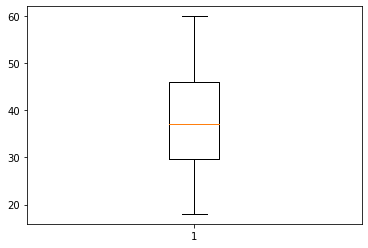

In [107]:
#Check the distribution of age 
plt.boxplot(cus['Age'])
np.median(cus['Age'])
np.mean(cus['Age'])
#Split customers into two groups (Old and Young) based on the cutoff (median of age)
cus['Age_Group'] = np.where(cus['Age'] > 37, 'Old', 'Young')

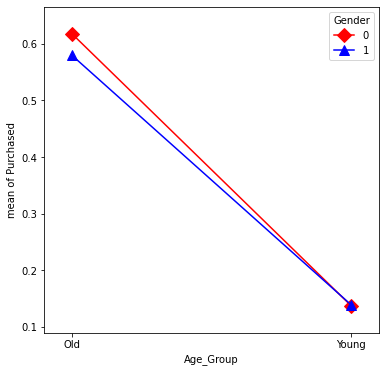

In [108]:
#Interaction plot
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(
    x=cus['Age_Group'],
    trace=cus['Gender'],
    response=cus['Purchased'],
    colors=["red", "blue"],
    markers=["D", "^"],
    ms=10,
    ax=ax,
)

### Q6. The following plots show effect of Income and Change in savings on Likelihood of buying a house. Observe the three plots (a, b, c) shown and answer the following questions for each plot:
- Should the regression equation include the interaction terms (interaction between Income and Average Savings) or not?
- Give your reasoning as to why or why shouldn’t they be included.

#### Answer:
- **(a)**. In this plot, there is an evidence of weak interaction between income level and average savings. Therefore, we should include the interaction term because the effect that average saving has on the likelihood of buying a house is not independent of income level.
- **(b)**. In this plot, there is an evidence of strong interaction between income level and average savings. Therefore, we should include the interaction term because the effect that average saving has on the likelihood of buying a house is not independent of income level. The likelihood of buying a house is higher for high income-level people when they are have lower savings, whereas the likelihood of buying a house is higher for lowe income-level people when they have larger savings.
- **(c)**. In this plot, there is no evidence of interaction between income level and average savings. Therefore, we should not include the interaction term because the effect that average saving has on the likelihood of buying a house is independent of income level. 
